In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_class = 10

In [3]:
(train_X, train_Y), (test_X, test_Y) = keras.datasets.mnist.load_data()

In [4]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


0
(28, 28)


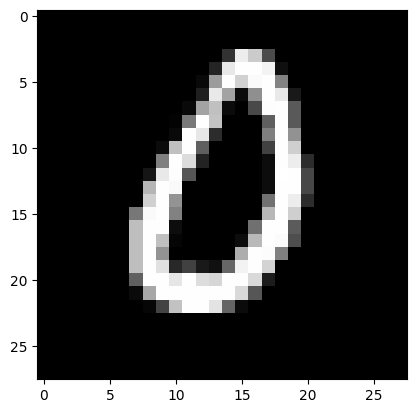

In [5]:
example = train_X[666]
print(train_Y[666])
plt.imshow(example, cmap = 'gray')
print(example.shape)

In [6]:
print(example.max())

255


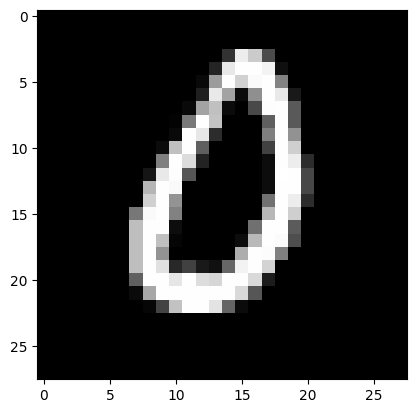

In [7]:
example = example/255
plt.imshow(example, cmap = 'gray')

In [8]:
print(example.max())

1.0


In [9]:
train_X = train_X/255
test_X = test_X/255

In [10]:
print(train_X.shape)

(60000, 28, 28)


In [11]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [12]:
print(train_X.shape)

(60000, 28, 28, 1)


In [13]:
train_Y[0]

5

In [14]:
train_Y = keras.utils.to_categorical(train_Y)
test_Y = keras.utils.to_categorical(test_Y)

In [15]:
train_Y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
img_shape = (28, 28, 1)

In [42]:
model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(60, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(120, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(240, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(num_class, activation = 'softmax')
])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 13, 60)        600       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 120)         64920     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 120)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 240)         259440    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 240)        

In [44]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = [keras.metrics.CategoricalAccuracy()])

In [45]:
hist = model.fit(train_X, train_Y, batch_size = 500, epochs = 10)

Epoch 1/10
120/120 [==============================] - 29s 229ms/step - loss: 0.5867 - categorical_accuracy: 0.8074
Epoch 2/10
120/120 [==============================] - 28s 230ms/step - loss: 0.1127 - categorical_accuracy: 0.9650
Epoch 3/10
120/120 [==============================] - 28s 231ms/step - loss: 0.0726 - categorical_accuracy: 0.9770
Epoch 4/10
120/120 [==============================] - 27s 223ms/step - loss: 0.0556 - categorical_accuracy: 0.9823
Epoch 5/10
120/120 [==============================] - 27s 223ms/step - loss: 0.0457 - categorical_accuracy: 0.9856
Epoch 6/10
120/120 [==============================] - 27s 223ms/step - loss: 0.0384 - categorical_accuracy: 0.9878
Epoch 7/10
120/120 [==============================] - 27s 227ms/step - loss: 0.0306 - categorical_accuracy: 0.9901
Epoch 8/10
120/120 [==============================] - 27s 224ms/step - loss: 0.0253 - categorical_accuracy: 0.9916
Epoch 9/10
120/120 [==============================] - 26s 221ms/step - loss: 0.0

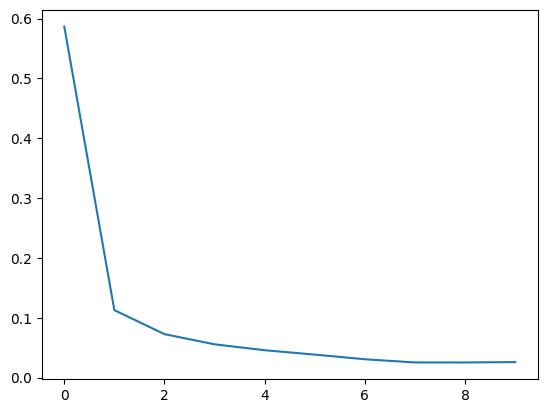

In [46]:
plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])

In [47]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 2s 5ms/step - loss: 0.0333 - categorical_accuracy: 0.9888


[0.03331536799669266, 0.9887999892234802]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 94ms/step
[[9.9998891e-01 2.3774579e-08 4.5487122e-06 7.7247355e-09 1.1163214e-08
  3.1484049e-09 3.1034672e-06 5.8651036e-08 2.5346844e-06 7.8028927e-07]] 0
[0.9999889]


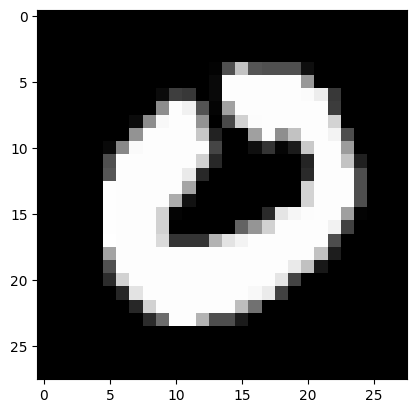

In [48]:
example = test_X[25]
print(test_Y[25])
plt.imshow(example, cmap = 'gray')
print(example.shape)
example = np.expand_dims(example, 0)
print(example.shape)
pred = model.predict(example)
print(pred, np.argmax(pred))
print(pred[pred > 0.5])